In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [4]:
path = os.getcwd()
files = os.listdir(path)
filesxlsx = [f for f in files if f[-4:] == 'xlsx']
filesxlsx

['Rabi2-18-2025-14-35.xlsx',
 'Rabi2-18-2025-14-33.xlsx',
 'Rabi2-18-2025-14-38.xlsx',
 'Rabi2-18-2025-14-34.xlsx',
 'Rabi2-18-2025-14-41.xlsx',
 'Rabi2-18-2025-14-39.xlsx',
 'Rabi2-18-2025-14-40.xlsx',
 'Rabi2-18-2025-14-36.xlsx',
 'Rabi2-18-2025-14-37.xlsx',
 'Rabi2-18-2025-14-42.xlsx']

In [5]:
prelimdf = pd.read_excel(filesxlsx[0], sheet_name=None)
xrange = len(prelimdf['data'].x)
ydata = np.zeros((xrange,len(filesxlsx)))

In [6]:
filenum = -1
for filepath in filesxlsx:
    filenum += 1
    df = pd.read_excel(filepath, sheet_name=None)
    for i, elem in enumerate(df['data'].y):
        ydata[i][filenum] = elem
        
ydata_ave = np.array([np.average(measurements) for measurements in ydata])*100
ydata_std = np.array([np.std(measurements) for measurements in ydata])
x_data = np.array(df['data'].x)/100

<ErrorbarContainer object of 3 artists>

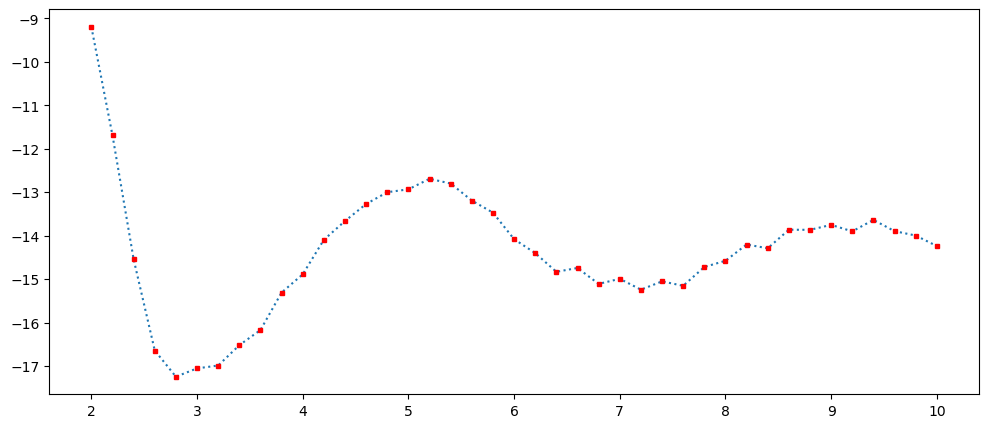

In [7]:
plt.figure(figsize=(12,5))

plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='red',
         mec='red', ls=":", ms=3)

8.894347950840142, -7.328309147411426, -14.277653598943477, 3.4279570406689834, 1.6011286715043807, 

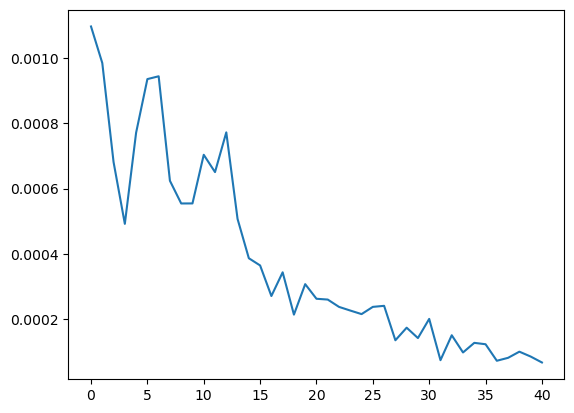

In [8]:
# Here we define the fitting functions, a sine function with an exponentially decaying amplitude.
def testfit(t, phi, A, B, T, O):
    return A*np.exp(-(t)/T)*np.sin(O*t+phi) + B

# Now, we need to define some way to weigh the data points, as the ones with larger x values
# have much smaller y values, and thus their RMSE is not as significant, so they are ignored.
weights = ydata_std*np.exp(-x_data/2.9)
#weights = x_data/
plt.plot(weights)

parameters, covariance = scipy.optimize.curve_fit(testfit, x_data, ydata_ave, p0 = [0.26, 37.61, -18.82, 1.54, 4.61], sigma=weights, method='lm')
                                                                                        # t_0, phi, A, B, T, O
for elem in parameters:
    print(elem, end=", ")

In [9]:
phi, A, B, T, O = parameters
dphi, dA, dB, dT, dO = np.sqrt(np.diagonal(covariance))

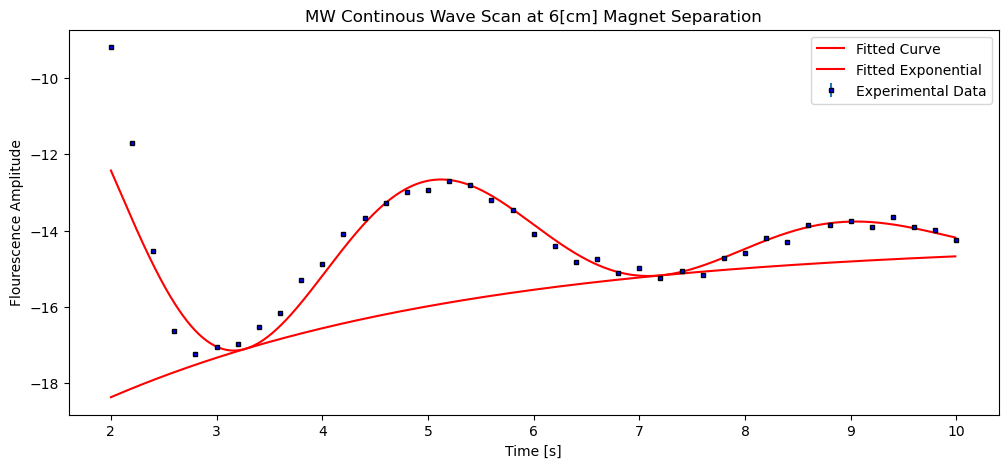

In [10]:
plt.figure(figsize=(12,5))

x_fit = np.arange(x_data[0], x_data[-1], 0.01)
y_fit = testfit(x_fit, *parameters)
ydata_std
plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='blue',
         mec='black', ls="None", ms=3, label = 'Experimental Data')
plt.plot(x_fit, y_fit, 'red', label = 'Fitted Curve')
plt.plot(x_fit, A*np.exp(-x_fit/T)+B, 'red', label = 'Fitted Exponential')
plt.xlabel("Time [s]")
plt.ylabel("Flourescence Amplitude")
plt.title("MW Continous Wave Scan at 6[cm] Magnet Separation")
plt.legend()

In [11]:
print("The generalized rabi frequency, which equals the rabi frequency (assuming detuning = 0) is", parameters[-1])

The generalized rabi frequency, which equals the rabi frequency (assuming detuning = 0) is 1.6011286715043807


# Parameter Adjustments

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def update_plot(phi, A, B, T, O):
    x_fit = np.arange(x_data[0], x_data[-1], 0.01)
    y_fit = testfit(x_fit, phi, A, B, T, O)
    
    plt.figure(figsize=(12, 5))
    plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='blue',
                 mec='black', ls="None", ms=3, label='Experimental Data')
    plt.plot(x_fit, y_fit, 'red', label='Fitted Curve')
    plt.hlines(B, 2, 10, colors='black', linestyles='dashed')
    plt.legend()
    plt.xlabel("X Data")
    plt.ylabel("Y Data")
    plt.title("Interactive Curve Fitting")
    plt.show()

interact(update_plot, 
         phi=FloatSlider(min=-3.1415926, max=3.1415926, step=0.001, value=-0.4),
         A=FloatSlider(min=0, max=40, step=0.001, value=8.9),
         B=FloatSlider(min=-20, max=0, step=0.001, value=-18.82),
         T=FloatSlider(min=1, max=5, step=0.001, value=5),
         O=FloatSlider(min=1.5, max=7, step=0.001, value=5));

interactive(children=(FloatSlider(value=-0.4, description='phi', max=3.1415926, min=-3.1415926, step=0.001), F…